# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [38]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [39]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [40]:
def svd_validation(A):
    u, s, vh = svd(A)
    aux = np.zeros(A.shape)
    for i in range(min(A.shape)):
        aux += s[i]*u[:,i:i+1]*(vh.T[:,i:i+1].T)
    return np.allclose(A,aux)

In [41]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');
def diagonal_matrix(shape, values):
    matrix = np.zeros(shape)
    for x in range(min(shape)):
        matrix[x,x] = values[x]
    return matrix

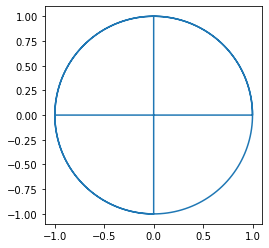

In [44]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [45]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


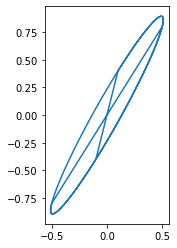

In [46]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [47]:
u, s, vh = svd(A)

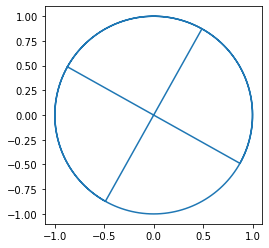

In [48]:
show_circle(u@circle)

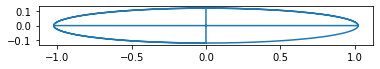

In [49]:
show_circle(diagonal_matrix((u.shape[0],vh.shape[0]),s)@circle)

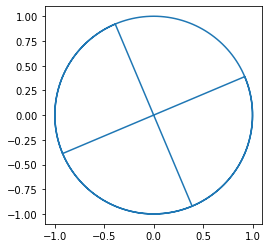

In [50]:
show_circle(vh@circle)

__Respuesta:__ Las 3 transformaciones son dos rotaciones y una compresión en el eje vertical. Justamente el hecho de que U y V son unitarias les permite ser únicamente rotaciones y no deforman los objetos.

__Respuesta:__ Los operadores anteriores son los pasos intermedios de aplicar directamente el operador A. Es decir, A se puede descomponer en rotar, aplastar y volver a rotar, que es justamente lo que hacen estos operadores.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [51]:
from pathlib import Path
from PIL import Image

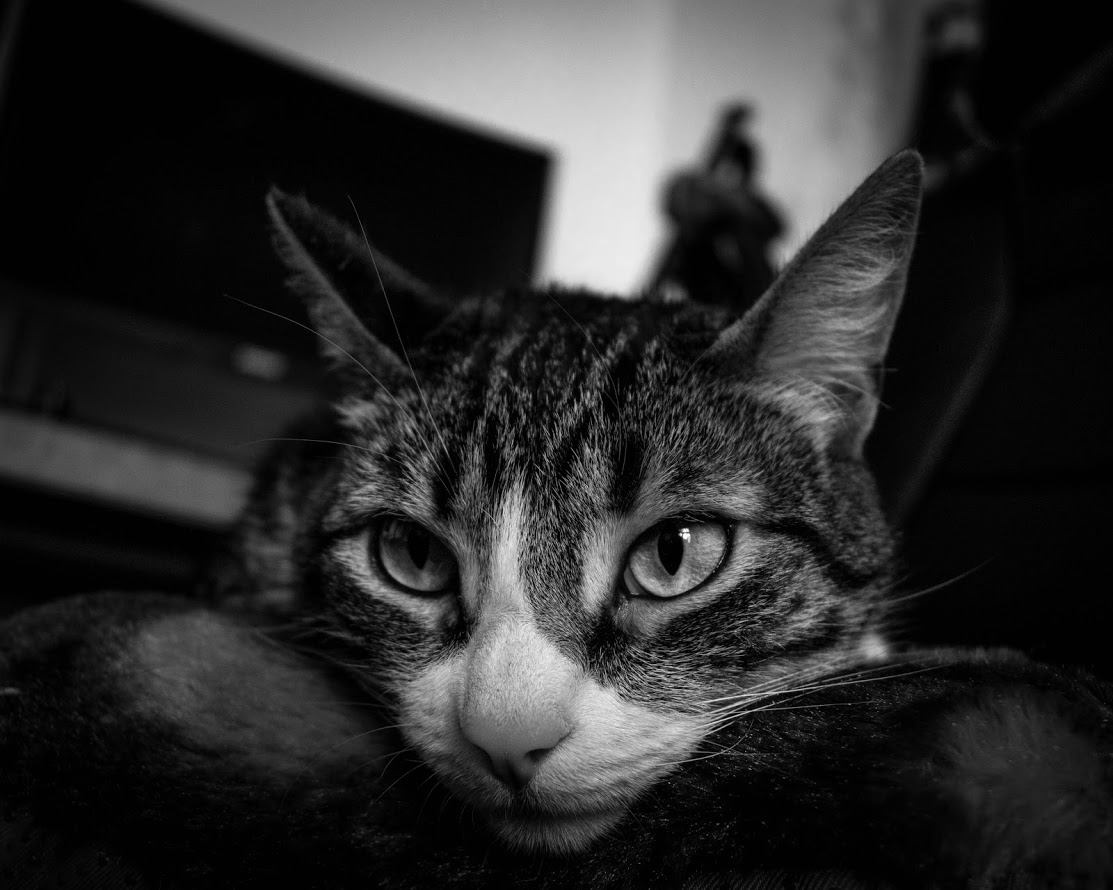

In [52]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [53]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [54]:
def low_rank_svd_approximation(A, l):
    u, s, vh = svd(A)
    aux = np.zeros(A.shape)
    for i in range(min(min(A.shape),l)):
        aux += s[i]*u[:,i:i+1]*(vh.T[:,i:i+1].T)
    error = 0
    dif = A-aux
    norma_A = 0
    for pos, sigma in enumerate(s):
        if pos>l:
            error += sigma**2
        norma_A += sigma**2
    error = error**0.5
    norma_A = norma_A**0.5
    print(f"El error es de {round(error/norma_A,4)*100}%")
    return aux

El error es de 21.14%


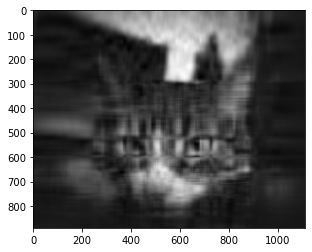

In [55]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

El error es de 11.12%


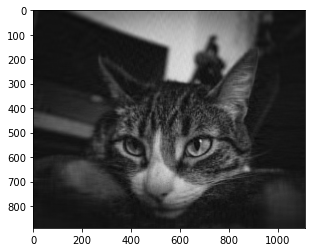

In [56]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [57]:
def low_rank_svd_tol_approximation(A, tol):
    u, s, vh = svd(A)
    l=0
    error = 1
    sum_sigm_l = 0
    
    norm_A = 0
    for sigma in s:
        norm_A += sigma**2
    
    while (error >= tol) and (min(A.shape)>l):
        sum_sigm_l += s[l]**2
        error = ((norm_A-sum_sigm_l)/norm_A)**0.5
        l += 1
    print(f"El valor de l es {l}")
    aux = np.zeros(A.shape)
    for i in range(min(min(A.shape),l)):
        aux += s[i]*u[:,i:i+1]*(vh.T[:,i:i+1].T)
    return aux

El valor de l es 64


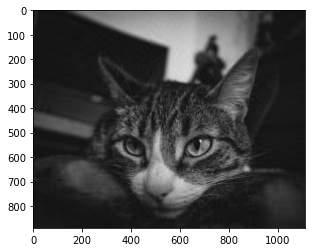

In [58]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

El valor de l es 457


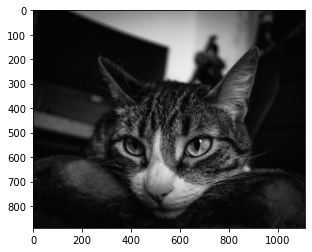

In [59]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

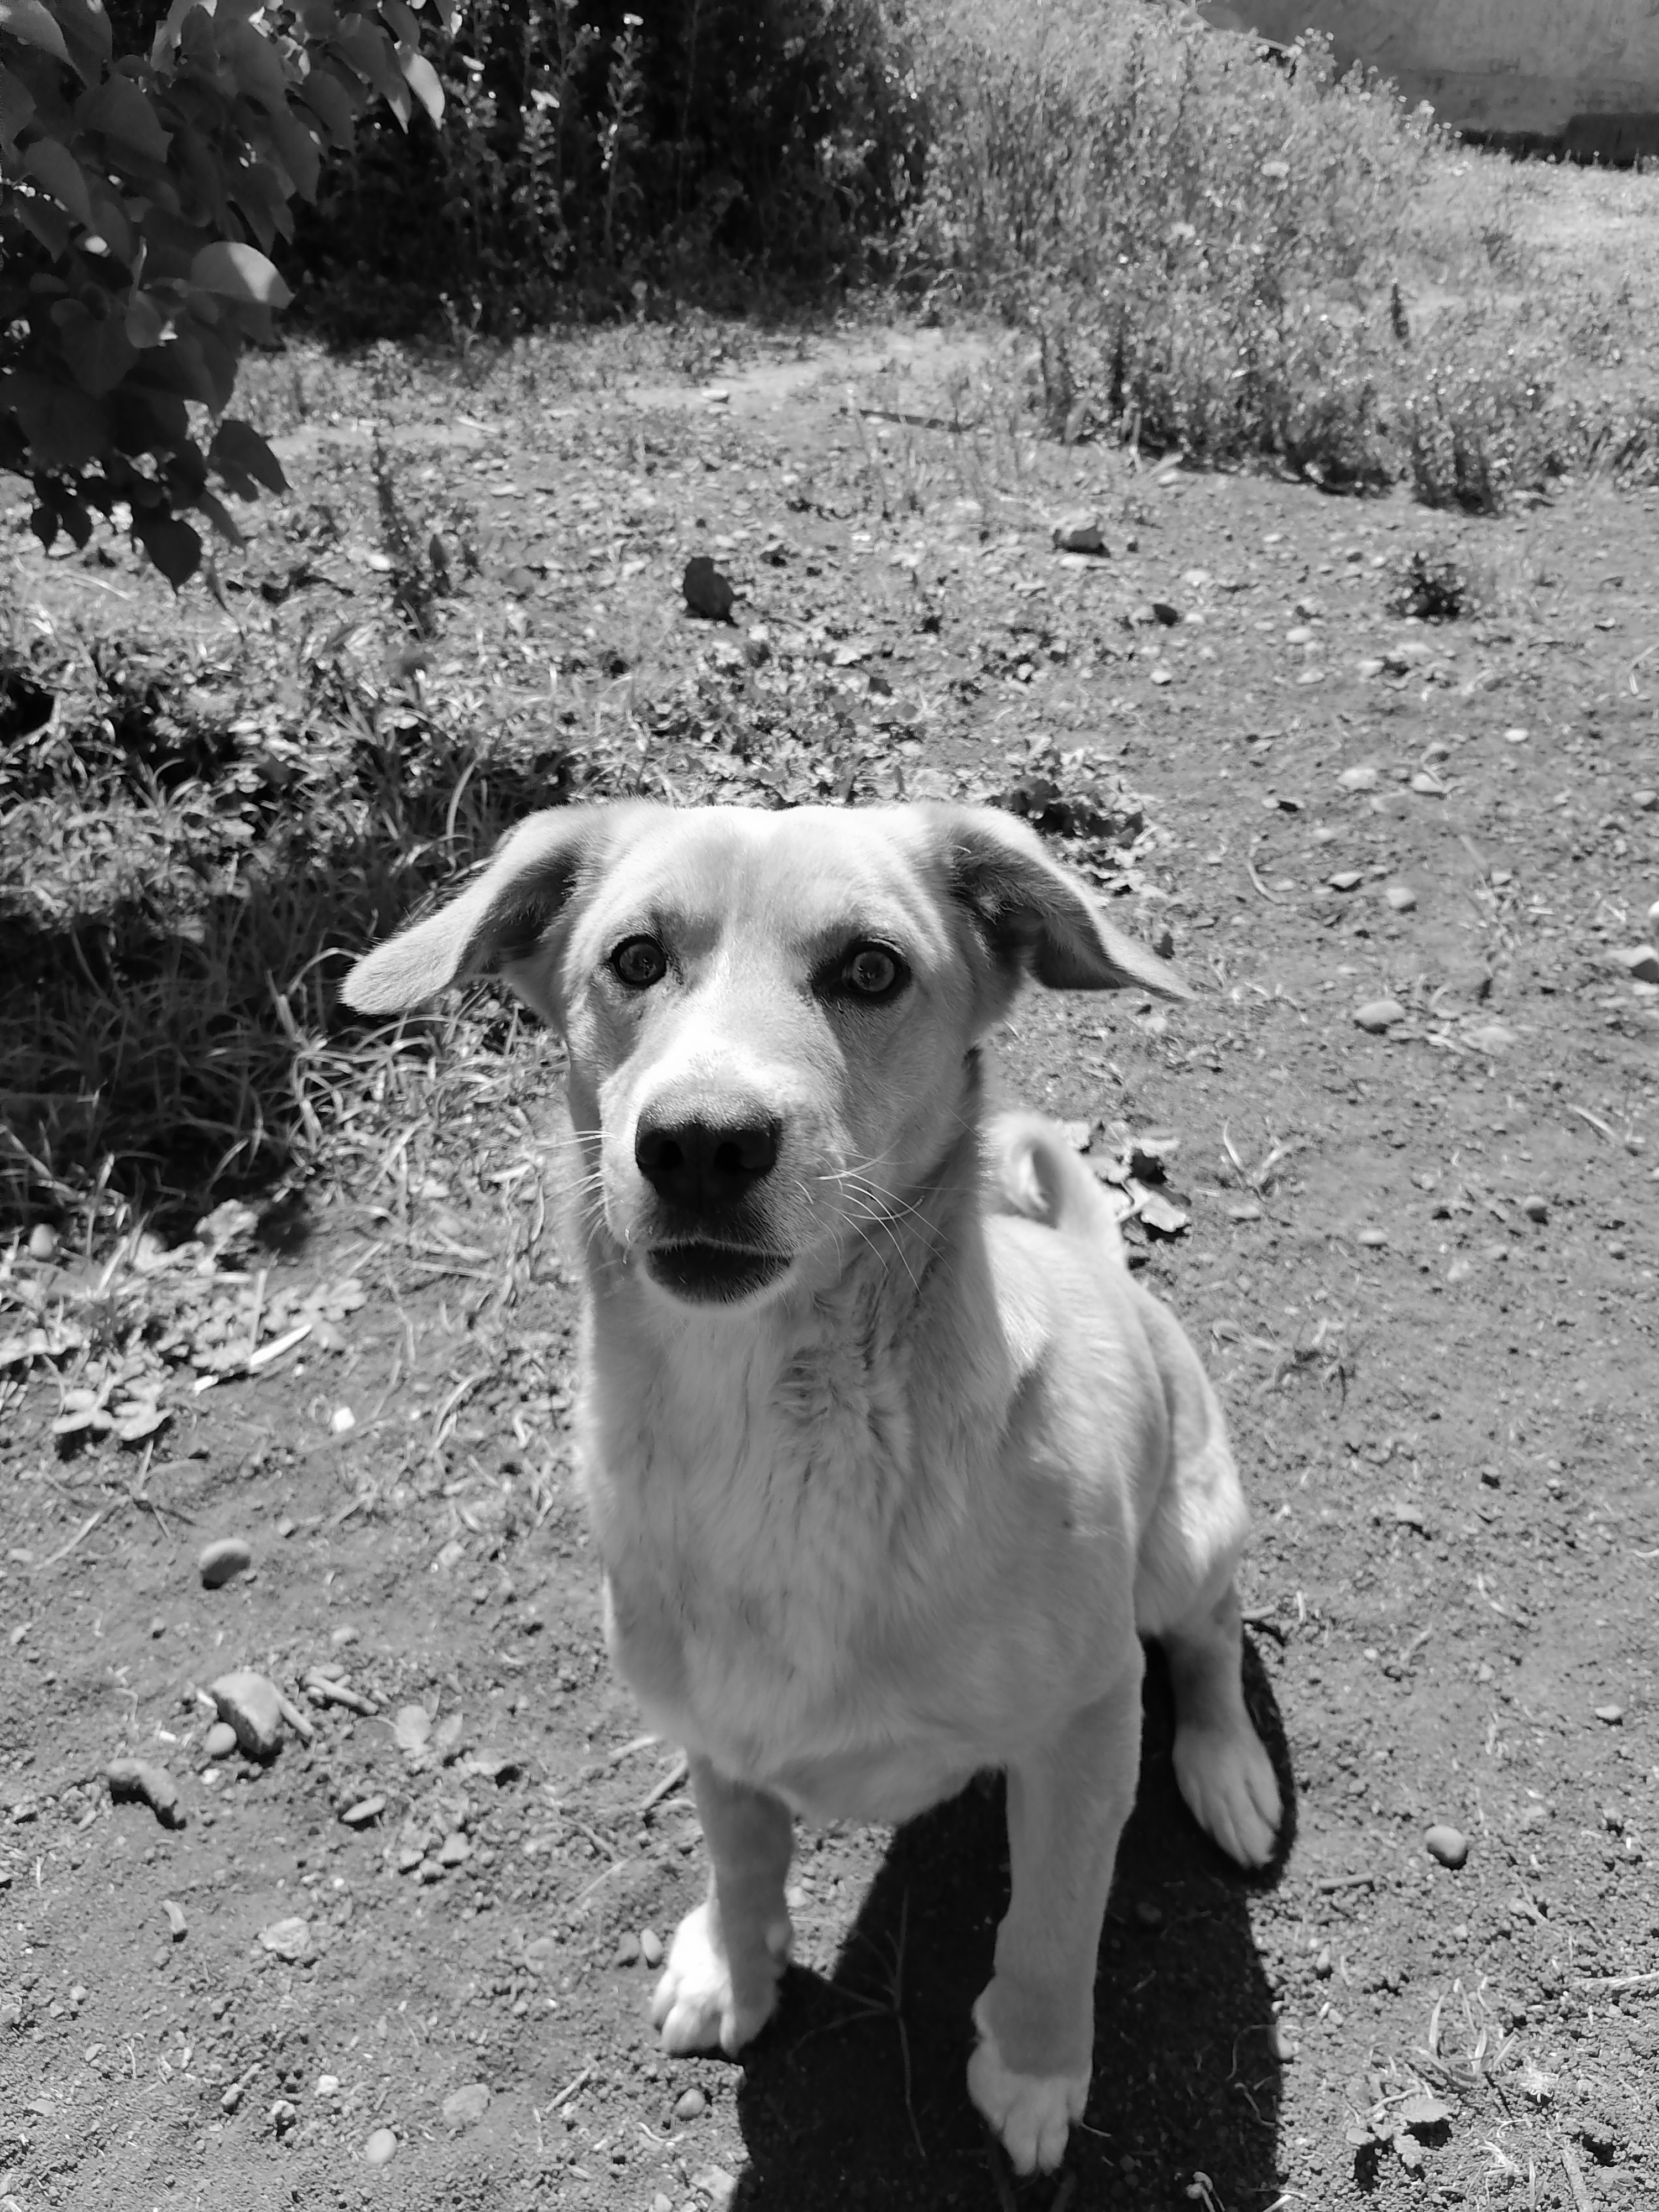

In [60]:
your_img_name = "Locky.jpg"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img

In [61]:
your_img_np = np.array(your_img)

In [62]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10) #Parece que la imagen tiene mucha resolución, así que se demora un poco.
plt.imshow(your_img10, cmap='gray');

KeyboardInterrupt: 

In [ ]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

In [ ]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

In [ ]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2) #Este en particular se demora muchísimo. Paciencia... :D
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ No es una forma útil de comprimir las imágenes, pues es un método muy mal optimizado. Hacemos siclos for, los cuales aumentan muchísimo el tiempo que tarda el computador en ejecutarlo. Un mucho mejor método es DCT (Discrete cosine transform) que sería un tipo de transformación de Fourier aplicada a la imágen.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [63]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [64]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

In [65]:
start_date = pd.to_datetime("2020-10-01", format="%Y-%m-%d")
end_date = pd.to_datetime("2020-10-11", format="%Y-%m-%d")

In [66]:
aux = (covid_comunas.dropna(subset = ["codigo_comuna"])
       .fillna(0)
       .drop(["tasa","codigo_comuna", "codigo_region"], axis = 1)
       .melt(id_vars =["region", "comuna", "poblacion"],var_name="fecha", value_name="casos_totales")
       .sort_values(by=["comuna","fecha"]))

aux["casos_nuevos"] = aux.groupby(["comuna"])["casos_totales"].diff(1)

aux = aux.loc[lambda df: (start_date <= pd.to_datetime(df["fecha"], format = "%Y-%m-%d")) & (pd.to_datetime(df["fecha"], format = "%Y-%m-%d") <= end_date)]

covid_tasa_promedio_nuevos = aux.groupby(["region", "comuna"]).agg(promedio_casos_nuevos=("casos_nuevos","mean"))

covid_tasa_promedio_nuevos["poblacion"]=aux.groupby(["region", "comuna"]).agg(poblacion =("poblacion",lambda df: df.max()))

tasa_ = (pd.DataFrame(covid_tasa_promedio_nuevos
             .apply(lambda df: df["promedio_casos_nuevos"]*100000/df["poblacion"], axis = 1), columns = ["tasa_promedio_casos_nuevos"]
             )["tasa_promedio_casos_nuevos"]
)
covid_tasa_promedio_nuevos["tasa_promedio_casos_nuevos"] = tasa_
covid_tasa_promedio_nuevos = covid_tasa_promedio_nuevos.sort_values(by = ["tasa_promedio_casos_nuevos"], ascending=False)

In [67]:
covid_tasa_promedio_nuevos.head(10)

promedio_casos_nuevos  poblacion  \
region     comuna                                                   
Magallanes Timaukel                           3.333333      282.0   
           San Gregorio                       4.000000      681.0   
           Laguna Blanca                      1.333333      264.0   
           Porvenir                          34.333333     7323.0   
           Punta Arenas                     631.333333   141984.0   
           Natales                           96.666667    23782.0   
Los Lagos  San Juan de la Costa              20.333333     7639.0   
           Rio Negro                         32.333333    14275.0   
Araucanía  Carahue                           46.666667    25486.0   
           Ercilla                           15.333333     8458.0   

                                 tasa_promedio_casos_nuevos  
region     comuna                                            
Magallanes Timaukel                             1182.033097  
           San Gregorio                          587.371512  
           Laguna Blanca                         505.050505  
           Porvenir                              468.842460  
           Punta Arenas                          444.651040  
           Natales                               406.469879  
Los Lagos  San Juan de la Costa                  266.177947  
           Rio Negro                             226.503211  
Araucanía  Carahue                               183.107065  
           Ercilla                               181.287933

__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ La región de Magallanes es la región cuyas comunas tienen la mayor tasa promedio de casos nuevos. Es más, su comuna con menor tasa (Natales), tiene casi el doble que la comuna (San Juan de la Costa) fuera de Magallanes con mayor tasa.

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [68]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

region  codigo_region  poblacion  2020-04-09  2020-04-10  \
0  Arica y Parinacota             15     252110        70.0         NaN   
1            Tarapacá              1     382773         NaN         NaN   
2         Antofagasta              2     691854       182.0       128.0   
3             Atacama              3     314709        57.0        52.0   
4            Coquimbo              4     836096         NaN         NaN   

   2020-04-11  2020-04-12  2020-04-13  2020-04-14  2020-04-15  ...  \
0        93.0       103.0         NaN        93.0        24.0  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2       107.0       175.0       103.0        95.0       117.0  ...   
3        60.0        25.0        20.0        22.0        25.0  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   2020-10-20  2020-10-21  2020-10-22  2020-10-23  2020-10-24  2020-10-25  \
0         949         367         728         794         738         737   
1        1104         907         648         972         932        1046   
2        2605         989        1229        1571        1890        2239   
3         687         388         319         792         838        1020   
4        1626         610         823        1008        1128        1057   

   2020-10-26  2020-10-27  2020-10-28  2020-10-29  
0         832         542         343         706  
1        1044         796         714         694  
2        3825        1749        1354        1858  
3         939         563         340         237  
4        1026         473        1503        1050  

[5 rows x 207 columns]

Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [69]:
covid_pcr_melt = (covid_pcr.drop(["poblacion", "codigo_region"], axis=1)
                  .melt(id_vars =["region"],var_name="fecha", value_name="nm_pcr")
                  .fillna(0)
                  .astype({"fecha": "datetime64"}))

covid_pcr_melt

region      fecha  nm_pcr
0     Arica y Parinacota 2020-04-09    70.0
1               Tarapacá 2020-04-09     0.0
2            Antofagasta 2020-04-09   182.0
3                Atacama 2020-04-09    57.0
4               Coquimbo 2020-04-09     0.0
...                  ...        ...     ...
3259           Araucanía 2020-10-29  1156.0
3260            Los Ríos 2020-10-29   584.0
3261           Los Lagos 2020-10-29  3708.0
3262               Aysén 2020-10-29   257.0
3263          Magallanes 2020-10-29   600.0

[3264 rows x 3 columns]

Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [70]:
covid_casos_melt = (covid_comunas.drop(["codigo_region", "comuna","codigo_comuna","poblacion","tasa"], axis=1)
                    .melt(id_vars =["region"],var_name="fecha", value_name="casos_totales")
                    .astype({"fecha": "datetime64"})
                    .groupby(by=["region","fecha"])
                    .sum()
                    .reset_index().sort_values(by = "fecha"))

covid_casos_melt

region      fecha  casos_totales
0            Antofagasta 2020-03-30           29.0
756            O’Higgins 2020-03-30            7.0
63             Araucanía 2020-03-30          187.0
441            Los Lagos 2020-03-30          104.0
126   Arica y Parinacota 2020-03-30            6.0
...                  ...        ...            ...
188   Arica y Parinacota 2020-10-26         9971.0
125            Araucanía 2020-10-26        11839.0
62           Antofagasta 2020-10-26        22245.0
944           Valparaíso 2020-10-26        42507.0
1007               Ñuble 2020-10-26         9634.0

[1008 rows x 3 columns]

Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [71]:
covid_corr_casos_pcr = pd.merge(covid_pcr_melt, covid_casos_melt, on= ["region", "fecha"], how = "outer")
covid_corr_casos_pcr["nm_pcr"].fillna(0, inplace= True)
covid_corr_casos_pcr["casos_totales"].ffill(inplace=True)
covid_corr_casos_pcr = (covid_corr_casos_pcr
                        .groupby("region").apply(lambda df: df["nm_pcr"].corr(df["casos_totales"]))
                        .sort_values())
covid_corr_casos_pcr

region
Metropolitana         0.336207
Valparaíso            0.531353
Antofagasta           0.568744
Atacama               0.580168
Aysén                 0.627790
Biobío                0.635196
O’Higgins             0.648792
Magallanes            0.656435
Maule                 0.666154
Tarapacá              0.682078
Los Ríos              0.699261
Ñuble                 0.712322
Los Lagos             0.731033
Coquimbo              0.743684
Arica y Parinacota    0.775954
Araucanía             0.828703
dtype: float64

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ La correlación para las distintas regiones es diferente. En algunas comunas como La Araucanía es la más lineal de todas. Es decir, a mayores exámenes PCR, más casos se encuentran. Para las demás regiones, con bajo indice de correlación, como la región Metropolitana, solo podemos decir que tiene un comportamiento no lineal. Para mi, realmente se contradice con mi sentido común, pues yo esperaría que a más exámenes PCR, menos contagiados se encontracen, de modo que obtuvieramos un índice negativo. Pero esto probablemente se deba a que los exámenes que se realizan, no son al público general, si no que se lo realizan personas que tienen sospechas de tener Covid.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ ¿Se han bajado las cuarentenas a tiempo?

Primero utilizaremos los datos de cuarentenas totales y los datos de casos totales por comuna.

In [72]:
cuarentenas_totales = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Totales.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

for x in cuarentenas_totales.iterrows(): #Hay algunos errores que tenemos que irlos corrigiendo a mano.
    if " Re-ingreso" in x[1]["nombre"]:
        name_old = x[1]["nombre"]
        name_new = name_old[0:name_old.index(" Re-ingreso")]
        cuarentenas_totales["nombre"].replace({name_old: name_new}, inplace = True)
    if "(Re-ingreso)" in x[1]["nombre"]:
        name_old = x[1]["nombre"]
        name_new = name_old[0: name_old.index("(Re-ingreso)")]
        cuarentenas_totales["nombre"].replace({name_old: name_new}, inplace = True)
    if " Re-Ingreso" in x[1]["nombre"]:
        name_old = x[1]["nombre"]
        name_new = name_old[0: name_old.index(" Re-Ingreso")]
        cuarentenas_totales["nombre"].replace({name_old: name_new}, inplace = True)

In [73]:
import time
from IPython.display import clear_output #Esto para graficar apropiadamente

covid_confirmados_por_comunas= (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

In [74]:
confirmados = (covid_confirmados_por_comunas
               .drop(["region", "codigo_region", "codigo_comuna", "poblacion", "tasa"], axis=1)
               .dropna())

cuarentenas = cuarentenas_totales.drop(["id", "alcance", "código_cut_comuna", "detalle", "superficie_en_m2", "perímetro_en_m", "region", "n_region"], axis=1)
cuarentenas = (cuarentenas
               .query("estado == 'Histórica'")
               .reset_index()
               .drop("index", axis=1)
               .astype({"fecha_de_inicio": "datetime64", "fecha_de_término": "datetime64"})
               .rename(columns = {"nombre" : "comuna"})
               .drop("estado", axis=1))

unicas = cuarentenas["comuna"].unique()
extras = confirmados["comuna"].unique()
extraer = []
#Lo que sigue es para quedarnos con las comunas que están en ambos Dataframes.
for comuna in extras:
    if comuna not in unicas:
        extraer.append(comuna)
index_extraer = confirmados.query(f"comuna in {extraer}").index.tolist()
confirmados.drop(index_extraer, inplace = True)

extraer = []
for comuna in unicas:
    if comuna not in extras:
        extraer.append(comuna)
index_extraer = cuarentenas.query(f"comuna in {extraer}").index.tolist()
cuarentenas.drop(index_extraer, inplace = True)

cuarentenas = (cuarentenas.sort_values(["comuna"]).reset_index().drop("index", axis = 1))
confirmados = (confirmados.sort_values(["comuna"]).reset_index().drop("index", axis = 1))

#Estos datos están repetidos y no tiene el nombre de "reingreso" (más errores...)
#display(cuarentena_sin_reingreso.query("comuna == 'Lonquimay'"))
#display(cuarentena_sin_reingreso.query("comuna == 'San Pedro de la Paz'"))

confirmados = (confirmados
               .melt(id_vars =["comuna"],var_name="fecha", value_name="casos_totales")
               .sort_values(["comuna","fecha"])
               .astype({"fecha" : "datetime64"}))

confirmados["casos_nuevos"] = confirmados.groupby(["comuna"])["casos_totales"].diff(1).fillna(0)


Ahora tenemos los datos ordenados y además filtrados.

Para responder la pregunta utilizaremos lo que sabemos de los cursos de cálculo. En particular, la segunda derivada. Que nos dirá si los casos están realmente bajando al momento del fin de la cuarentena.

Lamentablemente no tengo los conocimientos suficientes para aproximar una función y calcularle la __segunda derivada__. Pero hacer las restas apropiadas serán una buena aproximación.

Por lo que procederemos calculando la primera derivada, y con ello podremos calcular la segunda.

Además, es conocido que los efectos de una medida se notan realmente luego de __2 semanas__ de aplicarla, por lo que luego de tener la segunda derivada, filtraremos solo los datos de segundas derivadas que estén desde el fin de la cuarentena hasta 2 semanas después. Y calcularemos su promedio. A partir de ello, considerearemos que si este promedio es __negativo__, entonces la cuarentena se bajó __apropiadamente__. En caso contrario, consideraremos que fue una __medida muy anticipada__.

In [75]:
confirmados["dy"] = confirmados.groupby(["comuna"])["casos_nuevos"].diff(1).fillna(0)
confirmados["dx"] = confirmados.groupby("comuna")["fecha"].diff(1).fillna(pd.to_timedelta(0))
confirmados["dx"] = confirmados["dx"].astype("int64")/86400000000000
confirmados.reset_index(inplace= True) 

In [76]:
confirmados["dy/dx"] = confirmados.groupby("comuna").apply(lambda df: df["dy"]/df["dx"]).reset_index()[0]

In [77]:
confirmados = confirmados.drop(["index"], axis=1)

In [78]:
confirmados["d^2y/dx^2"] = confirmados.groupby("comuna")["dy/dx"].diff(1)/confirmados["dx"]
confirmados = confirmados.fillna(0)

In [79]:
confirmados

comuna      fecha  casos_totales  casos_nuevos    dy   dx  \
0     Alto Hospicio 2020-03-30            0.0           0.0   0.0  0.0   
1     Alto Hospicio 2020-04-01            0.0           0.0   0.0  2.0   
2     Alto Hospicio 2020-04-03            0.0           0.0   0.0  2.0   
3     Alto Hospicio 2020-04-06            5.0           5.0   5.0  3.0   
4     Alto Hospicio 2020-04-08            6.0           1.0  -4.0  2.0   
...             ...        ...            ...           ...   ...  ...   
4594       Vitacura 2020-10-12         1768.0           8.0 -10.0  3.0   
4595       Vitacura 2020-10-16         1778.0          10.0   2.0  4.0   
4596       Vitacura 2020-10-19         1790.0          12.0   2.0  3.0   
4597       Vitacura 2020-10-24         1802.0          12.0   0.0  5.0   
4598       Vitacura 2020-10-26         1808.0           6.0  -6.0  2.0   

         dy/dx  d^2y/dx^2  
0     0.000000   0.000000  
1     0.000000   0.000000  
2     0.000000   0.000000  
3     1.666667   0.555556  
4    -2.000000  -1.833333  
...        ...        ...  
4594 -3.333333  -1.527778  
4595  0.500000   0.958333  
4596  0.666667   0.055556  
4597  0.000000  -0.133333  
4598 -3.000000  -1.500000  

[4599 rows x 8 columns]

In [80]:
comunas = confirmados["comuna"].unique()
promedios = {"comuna": [], "promedio_SDP":[]}
for comuna in comunas:
    fecha_de_termino = cuarentenas.query(f"comuna == '{comuna}'")["fecha_de_término"].values[0]
    fecha_delta = fecha_de_termino+pd.to_timedelta("14 days")
    promedio = (confirmados.query(f"comuna == '{comuna}'").loc[lambda df: (df["fecha"]>= fecha_de_termino) & (df["fecha"]<=fecha_delta)]["d^2y/dx^2"].mean())
    promedios["comuna"].append(comuna)
    promedios["promedio_SDP"].append(promedio)
segundas_derivadas_parciales = pd.DataFrame(promedios)
cuarentenas_bien_bajadas = segundas_derivadas_parciales.loc[lambda df: df["promedio_SDP"]<0].count()[0]
cuarentenas_mal_bajadas = segundas_derivadas_parciales.loc[lambda df: df["promedio_SDP"]>=0].count()[0]
print(f"La cantidad de cuarentenas bien bajadas son: {cuarentenas_bien_bajadas}. En cambio, la cantidad de cuarentenas que fueron mal bajadas son: {cuarentenas_mal_bajadas}")
print(f"Lo que nos da un {round(cuarentenas_bien_bajadas/(cuarentenas_mal_bajadas+cuarentenas_bien_bajadas)*100,2)}% de acierto al bajar cuarentenas")

La cantidad de cuarentenas bien bajadas son: 38. En cambio, la cantidad de cuarentenas que fueron mal bajadas son: 30
Lo que nos da un 55.88% de acierto al bajar cuarentenas


In [81]:
#Esta es una pequeña animación que muestra una área de color durante el tiempo que dura la cuarentena.
#Además muestra los casos nuevos diarios. Esto es totalmente opcional. OBSERVACIONES: Hay algunas comunas que están muy desordenadas y que aparentemente la cuarentena se bajó super mal.
                                                                                     #Pero esto es debido a que los casos en esa comuna son muy bajos (Ej:25 casos el día que huvo más aumento)
#for comuna in confirmados["comuna"].unique():
#    mini_df = confirmados.query(f"comuna == '{comuna}'")
#    X = np.array((mini_df["fecha"]))
#    Y = np.array(mini_df["casos_nuevos"])
#    fig, x_1 = plt.subplots(1,1)
#
#    start = np.array((cuarentenas.query(f"comuna == '{comuna}'")["fecha_de_inicio"]))
#    end = np.array((cuarentenas.query(f"comuna == '{comuna}'")["fecha_de_término"]))
#    for pos_, fecha in enumerate(start):
#        x_1.fill_betweenx(y = np.array([Y.min(),Y.max()]), x1 = fecha, x2 = end[pos_] ,alpha = 0.3)
#    plt.scatter(X,Y)
#    clear_output(wait=True)
#    plt.title(f"{comuna}")
#    plt.xlabel("Días")
#    plt.ylabel("casos nuevos por día")
#    plt.show()
#    time.sleep(1)

__Respuesta:__ Como tenemos un 55% de acierto, podemos decir que hay muchas comunas en las que fue un error bajar la cuarentena, y es por esto que varias comunas tuvieron un re-ingreso a la cuarentena. Pero aún hay cosas que afinar. Pues nuestros cálculos incluyen comunas que tuvieron muy pocos casos, para los cuales nuestro análisis puede tacharlo como malo, cuando en realidad no fue nada grave. Además solo consideramos las primeras cuarentenas, tal vez si incluyeramos las segundas, nuestras conclusiones serían otras, pues de los errores se aprende.

En conclusión muchas cuarentenas se bajaron antes de tiempo. Y un fallo de 45% es demasiado cuando están en riesgo vidas humanas.

ADVERTENCIA: Los cálculos hechos anteriormente son precarios y terminan siendo solamente aproximaciones, por lo que las conclusiones podrían estar erradas. La vida real tiene muchísimas más variables que no estamos considerando.

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__¿Cuál es el panorama general de Chile con respecto al Covid-19?

Para responder la pregunta haremos diversas gráficas. Reutilizaremos DataFrames que usamos antes (Casos por comuna), además utilizaremos el de fallecidos por comuna.

Para responder la pregunta, seguiremos el siguiente razonamiento: Si hay zonas donde hay muchas más personas reunidas en un solo lugar, es más posible que hayan más contagios. Por lo que es lógico pensar que las comunas con más densidad de habitantes tengan más contagios.

Asumiendo que las comunas con mayor densidad tienen una más alta tasa de contagio, veremos cómo vá cambiando la correlacion de contagios con la densidad de la comuna a medida que pasa el tiempo. También veremos esto mismo pero con los fallecidos.

Por otra parte también podemos ver cómo van los contagios y fallecidos en las comunas con mayor densidad de habitantes. Pues serían las que más aportan a las cifras.

OBS: Obtuvimos de wikipedia la superficie de cada comuna y se modificó con python para obtener el archivo Superficie.txt.

Primero temenemos que quedarnos solamente con las comunas que están en ambos DataFrames.

In [82]:
superficie = pd.read_csv(Path().resolve().parent / "data" / "Superficie.txt")
comunas_no_en_comun = []
comunas_en_comun = []
for comuna in comunas:
    if comuna not in superficie["comuna"].unique():
        comunas_no_en_comun.append(comuna)
    else:
        comunas_en_comun.append(comuna)
superficie.drop(comunas_no_en_comun, inplace=True)

In [83]:
covid_con_fecha = covid_confirmados_por_comunas.query(f"comuna in {comunas_en_comun}").reset_index().drop(["index","region","codigo_region","tasa","codigo_comuna"], axis=1)

In [84]:
covid_con_fecha = covid_con_fecha.melt(["comuna","poblacion"], var_name="fecha", value_name="casos_totales")

In [85]:
covid_con_fecha=covid_con_fecha.astype({"fecha": "datetime64"})
ultima_fecha = covid_con_fecha.loc[lambda df: df["fecha"] == "2020-10-24"]
ultima_fecha = ultima_fecha.sort_values("comuna")

In [86]:
comuna_sup = []
for comuna in superficie["comuna"].unique():
    if comuna not in comunas_en_comun:
        comuna_sup.append(comuna)
superficie_filtered = superficie.query(f"comuna not in {comuna_sup}").sort_values("comuna")

Aquí nos aprovechamos que el DataFrame tiene la población, para así calcular la densidad poblacional.

In [87]:
superficie_filtered = superficie_filtered.reset_index().drop("index", axis=1)
ultima_fecha = ultima_fecha.reset_index().drop("index",axis=1)
ultima_fecha["densidad"] = ultima_fecha["poblacion"]/superficie_filtered["superficie"]

extra = covid_confirmados_por_comunas.drop(["region", "codigo_region", "codigo_comuna", "tasa","poblacion"], axis=1)
extra = extra.query(f"comuna in {comunas_en_comun}")
extra = extra.sort_values("comuna").reset_index().drop("index",axis=1)
extra["densidad"] = ultima_fecha["poblacion"]/superficie_filtered["superficie"]

Ahora como tenemos los datos suficientes podemos obtener la primera gráfica. Veremos cómo cambia la correlación de casos totales con la densidad poblacional, con el paso del tiempo.

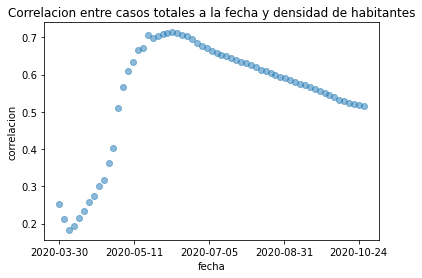

In [88]:
fechas = extra.columns.delete([0,len(extra.columns)-1])
correlaciones = {}
for fecha in fechas:
    correlaciones[fecha] = extra[fecha].corr(ultima_fecha["densidad"])
X = []
Y = []
for fecha, corr in correlaciones.items():
    X.append(fecha)
    Y.append(corr)
plt.scatter(X,Y, alpha=0.5)
plt.xticks(np.linspace(0,61,5))
plt.title("Correlacion entre casos totales a la fecha y densidad de habitantes")
plt.xlabel("fecha")
plt.ylabel("correlacion")
plt.show()

Como para ciertos intervalos de tiempo, la correlación alcanza y supera el valor de 0.7, podemos concluir que en esos momentos había una alta correlación lineal entre la densidad y los casos totales. De modo que efectivamente se tenía que las comunas con mayor densidad poblacional eran las que más casos acumularon.

Al final de la gráfica, podemos ver que hay una tendencia a la baja. Con lo que solamente podemos concluir que se está perdiendo el comportamiento lineal de casos totales v/s densidad.

Veamos ahora la correlación de fallecidos con la densidad poblacional.

In [89]:
fallecidos_por_comuna = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

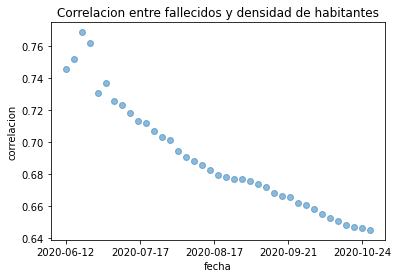

In [90]:
fallecidos = (fallecidos_por_comuna.query(f"comuna in {comunas_en_comun}")
              .drop(["region", "codigo_region", "codigo_comuna", "poblacion"], axis=1)
              .sort_values("comuna")
              .reset_index()
              .drop("index",axis=1))
fechas = fallecidos.drop("comuna",axis=1).columns
X = []
Y = []
for fecha in fechas:
    X.append(fecha)
    Y.append(fallecidos[fecha].corr(ultima_fecha["densidad"]))
plt.scatter(X,Y, alpha=0.5)
plt.xticks(np.linspace(0,37,5))
plt.title("Correlacion entre fallecidos y densidad de habitantes")
plt.xlabel("fecha")
plt.ylabel("correlacion")
plt.show()

Podemos ver que al comienzo de la gráfica tenemos valores superiores a 0.7, lo que nos indica un alto comportamiento lineal. Las comunas con mayor densidad eran las que más fallecidos acumulaban.

Pero nuevamente esta gráfica está a la baja. No se puede concluir mucho al respecto, pues podría estar a la baja porque las muertes estarían estarían aumentando de forma exponencial. Necesitaremos más datos para concluir algo más.

Es por esto que veremos ahora la cantidad de fallecidos diarios para las comunas con mayor densidad.

In [91]:
fallecidos["densidad"] = ultima_fecha["densidad"]
comunas_graf = fallecidos.sort_values("densidad", ascending=False)["comuna"][0:5]
fallecidos = fallecidos.melt(["comuna","densidad"], var_name="fecha", value_name = "fallecidos")

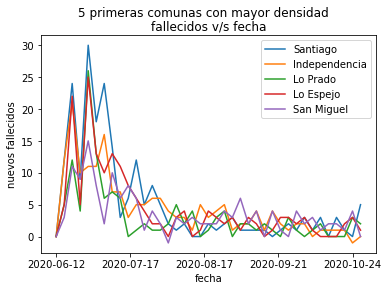

In [92]:
for comuna in comunas_graf:
    plt.plot(fallecidos.query(f"comuna == '{comuna}'")["fecha"], fallecidos.query(f"comuna == '{comuna}'")["fallecidos"].diff(1).fillna(0), label=comuna)
plt.legend()
plt.suptitle("5 primeras comunas con mayor densidad")
plt.xticks(np.linspace(0,37,5))
plt.title("fallecidos v/s fecha")
plt.xlabel("fecha")
plt.ylabel("nuevos fallecidos")
plt.show()

Aquí claramente podemos ver que los fallecidos están a la baja. Lo cual es bueno, pues podemos ahora sumar con la gráfica anterior, que también está a la baja y concluir que es una tendencia de la mayoría de las comunas.

Podemos hacer lo mismo con los casos nuevos por día, para estas mismas comunas.

In [93]:
covid = (covid_confirmados_por_comunas
         .query(f"comuna in {comunas_en_comun}")
         .drop(["region","codigo_region","tasa","codigo_comuna","poblacion"],axis=1)
         .sort_values("comuna")
         .reset_index()
         .drop("index", axis=1))
covid["densidad"] = ultima_fecha["densidad"]
comunas_graf = covid.sort_values("densidad", ascending=False)["comuna"][0:5]
covid = covid.melt(["comuna", "densidad"], var_name="fecha", value_name = "casos_totales")

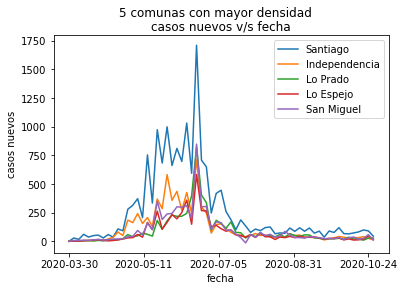

In [94]:
for comuna in comunas_graf:
    plt.plot(covid.query(f"comuna == '{comuna}'")["fecha"], covid.query(f"comuna == '{comuna}'")["casos_totales"].diff(1).fillna(0), label=comuna)
plt.legend()
plt.suptitle("5 comunas con mayor densidad")
plt.xticks(np.linspace(0,61,5))
plt.title("casos nuevos v/s fecha")
plt.xlabel("fecha")
plt.ylabel("casos nuevos")
plt.show()

Nuevamente, podemos apreciar otra gráfica que está a la baja para las comunas con mayor densidad poblacional.

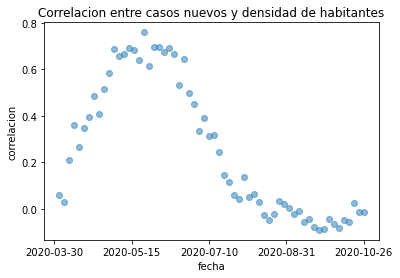

In [95]:
covid["casos_nuevos"] = covid.groupby(["comuna"])["casos_totales"].diff(1).fillna(0)
covid = covid.sort_values(["comuna","fecha"])
fechas = covid["fecha"].unique()
X = []
Y = []
for fecha in fechas:
    Y.append(covid.query(f"fecha == '{fecha}'")["casos_nuevos"].reset_index().drop("index", axis=1)["casos_nuevos"].corr(ultima_fecha["densidad"]))
    X.append(fecha)
plt.scatter(X,Y, alpha = 0.5)
plt.xticks(np.linspace(0,62,5))
plt.title("Correlacion entre casos nuevos y densidad de habitantes")
plt.xlabel("fecha")
plt.ylabel("correlacion")
plt.show()

En las mismas fechas notamos una alta correlación lineal entre los casos nuevos con la densidad, pero en los últimos meses esta correlación se perdió y como estos valores rondan el 0, podemos decir que no existe una correlación lineal. Pero como vimos anteriormente los casos nuevos están a la baja. Por lo que podemos concluir que independiente de la densidad poblacional, los casos están disminuyendo.

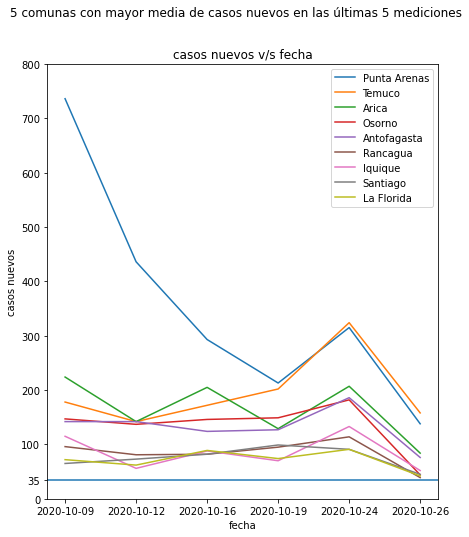

In [193]:
ultimas_fechas = covid["fecha"].sort_values(ascending = False).unique()[:5]
casos_nuevos_mean = (covid
                     .query(f"fecha >= '{ultimas_fechas[-1]}'")
                     .drop(["densidad","fecha","casos_totales"], axis=1)
                     .groupby(["comuna"])
                     .agg("mean")
                     .sort_values("casos_nuevos", ascending = False)
                     .reset_index())
comunas_peores = casos_nuevos_mean.query("casos_nuevos >= 70")["comuna"].unique()
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111)
for comuna in comunas_peores:
    ax.plot(covid.query("fecha >= '2020-10-09'")["fecha"]
            .unique(),covid.query("fecha >= '2020-10-09'")
            .query(f"comuna == '{comuna}'")["casos_nuevos"], label=comuna)
plt.legend()
plt.suptitle("5 comunas con mayor media de casos nuevos en las últimas 5 mediciones")
plt.ylim(0)
plt.axhline(y=35)
plt.title("casos nuevos v/s fecha")
plt.xlabel("fecha")
plt.ylabel("casos nuevos")
a,b = plt.yticks()
lista = list(a)
lista[2:len(a)+1]=lista[1:]
lista[1]=35
a = np.array(lista)
plt.yticks(a)
plt.show()

Aquí podemos ver que las comunas que peor se encuentran, se mantienen en cierto rango relativamente bajo de casos nuevos.

__Respuesta:__ Por todo lo visto anteriormente el significado de que las correlaciones calculadas anteriormente disminuyan, se deben a que efectivamente los casos y los fallecidos están disminuyendo. Sobretodo en las comunas con más desidad poblacional.

Por lo que podemos decir que Chile se encuentra poco a poco superando esta crisis del Covid-19. Lo que no significa que en un futuro no volvamos a tener rebrotes, pero si podemos asegurar que los casos están bajando y que mientras las personas sigan tomando las medidas de seguridad necesarias, esta tendencia no tendría porqué cambiar.